In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df_train = pd.read_csv("C:/Users/Spurthi Bollina/Documents/Titanic Sruvival Challenge/train.csv")
df_test = pd.read_csv("C:/Users/Spurthi Bollina/Documents/Titanic Sruvival Challenge/test.csv")

df_train.describe() # Summary on numeric values
df_train.isnull().sum() # Age, Cabin and Embarked has missing values
df_test.isnull().sum() # Age, Fare and Cabin has missing values
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA 

0    549
1    342
Name: Survived, dtype: int64


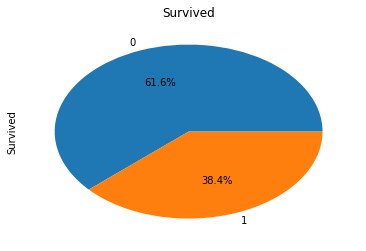

In [16]:
# How many has survived?

print(df_train['Survived'].value_counts())
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Survived')
plt.show()



In [45]:
# SEX
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

df_train.groupby(['Sex', 'Survived'])['Survived'].count()/df_train.groupby(['Sex'])['Survived'].count()

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Survival rate for women is 74% where as for men it is 19%
This clearly indicates that Sex plays a vital role in Surviving

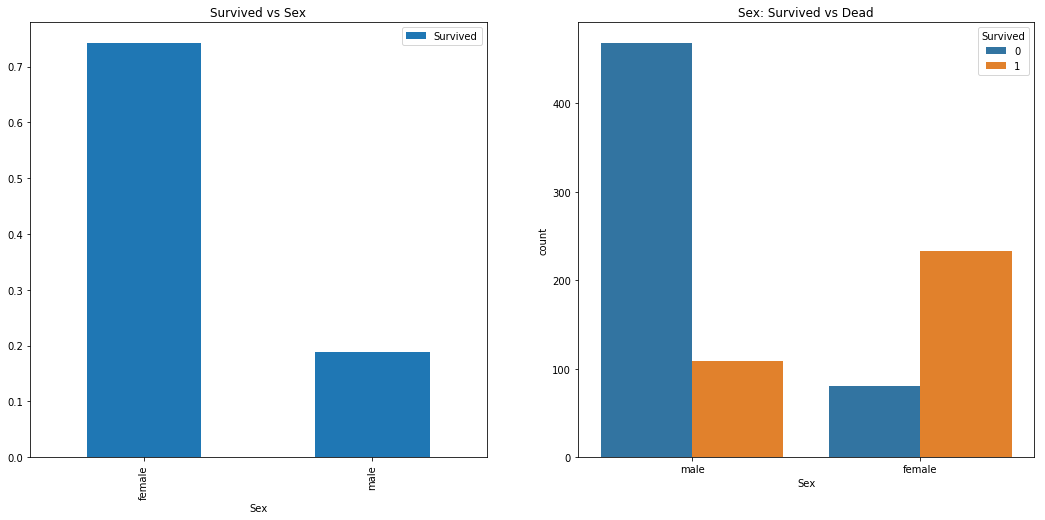

In [28]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex') 
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()



In [53]:
# Pclass - Ordinal Feature

pd.crosstab(df_train.Pclass, df_train.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [47]:
df_train.groupby(['Pclass', 'Survived'])['Survived'].count()/df_train.groupby(['Pclass'])['Survived'].count()


Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

There seems a pattern to be observed, Pclass 1 have 62% survival rate and it kept decreasing for other classes

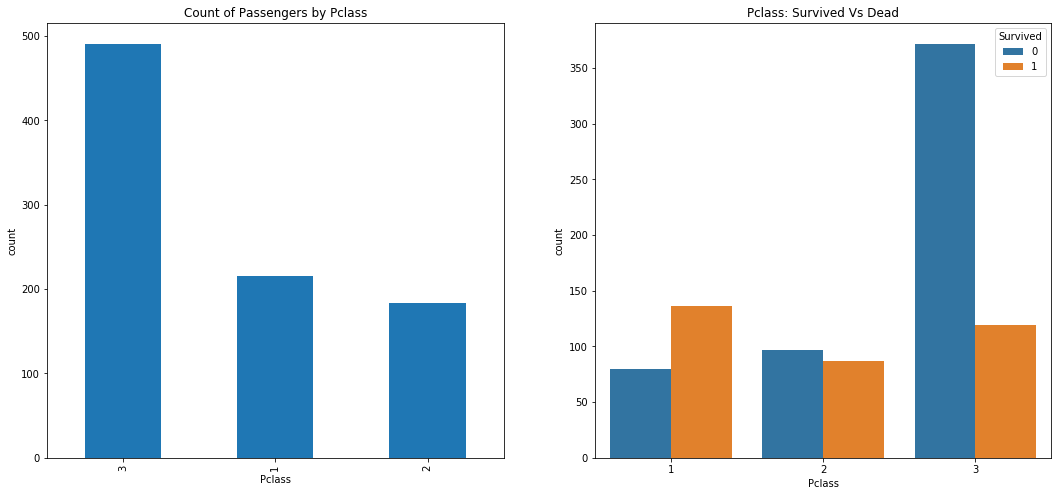

In [79]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Count of Passengers by Pclass')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived Vs Dead')

#for p in ax[1].patches:
#    x=p.get_bbox().get_points()[:,0]
#    y=p.get_bbox().get_points()[1,1]
#    ax[1].annotate('{:.1f}%'.format(100.*y/len(df_train)), (x.mean(), y), 
#            ha='center', va='bottom') # set the alignment of the text


plt.show()
